# The correlations between optimizers and median house prediction data in neural networks

> Real estate requires meticulous prediction ability from individuals involved, as especially now, in the current saturated market state, it is more important than ever to pose accurate predictions to clients. 
>
> My research question deals in this sector by bringing to light the effect of different optimizers on neural network prediction outputs.
> In addition, we examine how these said optimizers affect the models functionality as a whole.


### Hypothesis

> Regarding Optimizer Functions
>
> - 'Adam'
>
> - 'SGD'
>
> - ''Ftrl
>
> We will be examining the above three optimizers for the purpose of this study.
>
> Respectively, my predictions on the effects of these particular optimizers on the model is as follows:
>
> - Will create a usable model but will incur more pronounced loss
>
> - Will create the most well-rounded/effective model
>
> - Will create the least effective of the three models




***
# Model Implementation
***

In [1]:
#dependencies

# for df
import pandas as pd
# for input scaling
from sklearn import preprocessing
# for data wrangling 
from sklearn .model_selection import train_test_split
# for architecture description
from keras.models import Sequential
from keras.layers import Dense

# init df
df = pd.read_csv('data/housepricedata.csv')
df

2023-02-17 00:11:04.595530: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [2]:
# data prep

# coverting data into an array, storing in var dataset
dataset = df.values 

# input features are X, so we split into 10 columns
X = dataset[:,0:10]

# ouput
Y = dataset[:,10]

# scaling input data so all values between 0-1 inclusive
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

# now split datset into test, validation, and training
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
# above splits in two so need to split test and val into sperate sets
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# data ready!

In [3]:
# model architecture description

# describes architecture to keras, ouput is sigmoid func while hidden are relu
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), #10 imputs
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='SGD', #sgd optimizer
              loss='binary_crossentropy', #loss function for outputs that take the values 1 or 0
              metrics=['accuracy'])


hist = model.fit(X_train, Y_train, #specify data to train
          batch_size=32, epochs=100, #iterations
          validation_data=(X_val, Y_val)) #specify validation data

Epoch 1/100


2023-02-17 00:11:21.904136: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


32/32 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.7162 - val_loss: 0.6777 - val_accuracy: 0.7900
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.8014 - val_loss: 0.6715 - val_accuracy: 0.7945
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.8043 - val_loss: 0.6662 - val_accuracy: 0.7900
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6651 - accuracy: 0.7877 - val_loss: 0.6613 - val_accuracy: 0.7991
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.7828 - val_loss: 0.6566 - val_accuracy: 0.8037
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.7945 - val_loss: 0.6518 - val_accuracy: 0.8037
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.8053 - val_loss: 0.6469 - val_accuracy: 0.8082
Epoch 8/100
32/32 [======

In [5]:
model.evaluate(X_test, Y_test)[1] #evaluate accuracy by accessing index 1

7/7 [==============================] - 0s 613us/step - loss: 0.2618 - accuracy: 0.8950


0.8949771523475647

***
# Visualization
***

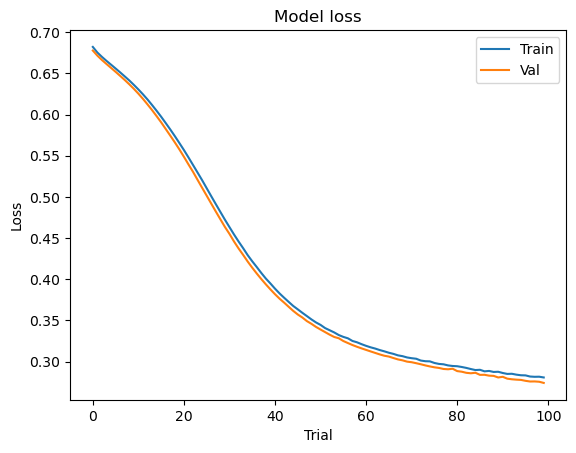

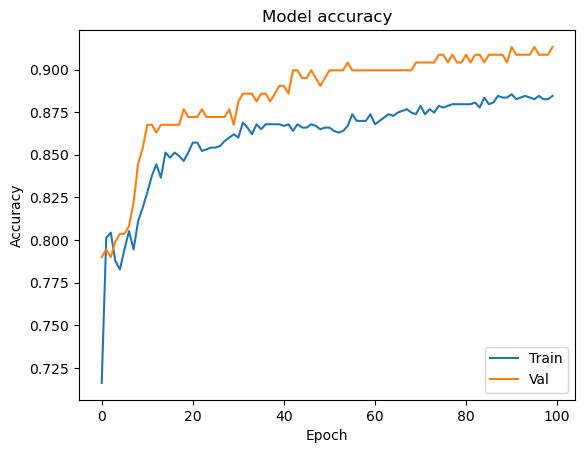

In [7]:
#important to recognize overfitting in model

import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Trial')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


***
# Conclusion
***

> To conclude these experiments, we find that real estate agents, and individuals involved, would fare better using the ‘SGD’ optimizer for median house data predictions. 
>
> This choice is favorable as, based on the data, it results in outputs that indicate lower overfitting and better predictions overall.
>
> Concerning the other two optimizers:
>  - ‘Adam’ does an acceptable job with this dataset, although it outputs lower accuracies overall, which is not favorable for the purpose of the network
>
> - ‘Ftrl’ outputs results that are simply of no use, as the model portrays significant stagnation unacceptably low accuracies

 **Note: The experiement has been left with the 'SGD' optimizer as displayed**

